In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# 데이터 전체 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# 수량, 가격에 음수가 있다니! 수량, 가격 모두 음수와 0을 제거한다. null값도

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
# 용량이 조금 커서 조정

df['Quantity'] = df['Quantity'].astype(np.int32)
df['CustomerID'] = df['CustomerID'].astype(np.int32)
df['UnitPrice'] = df['UnitPrice'].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int32  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float32
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float32(1), int32(2), object(5)
memory usage: 22.8+ MB


In [15]:
# 총 금액이 없어서 추가

df['TotalPrice'] = round(df['Quantity'] * df['UnitPrice'], 2)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [16]:
# 코호트에서 안쓸 행 정리

df_c = df.drop(['StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country'], axis = 1)
df_c

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,12/1/2010 8:26,17850,15.30
1,536365,12/1/2010 8:26,17850,20.34
2,536365,12/1/2010 8:26,17850,22.00
3,536365,12/1/2010 8:26,17850,20.34
4,536365,12/1/2010 8:26,17850,20.34
...,...,...,...,...
541904,581587,12/9/2011 12:50,12680,10.20
541905,581587,12/9/2011 12:50,12680,12.60
541906,581587,12/9/2011 12:50,12680,16.60
541907,581587,12/9/2011 12:50,12680,16.60


In [17]:
df_c['InvoiceDate'] = pd.to_datetime(df_c['InvoiceDate'], infer_datetime_format = True)
df_c

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850,15.30
1,536365,2010-12-01 08:26:00,17850,20.34
2,536365,2010-12-01 08:26:00,17850,22.00
3,536365,2010-12-01 08:26:00,17850,20.34
4,536365,2010-12-01 08:26:00,17850,20.34
...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680,10.20
541905,581587,2011-12-09 12:50:00,12680,12.60
541906,581587,2011-12-09 12:50:00,12680,16.60
541907,581587,2011-12-09 12:50:00,12680,16.60


In [32]:
# 11년 12월은 9일까지 데이터밖에 없어서 11년 12월 데이터 삭제

df_c = df_c[df_c['InvoiceDate'] < '2011-12-01']
df_c

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice,Month,Month_started,Month_passed
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01,0
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01,0
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...
516364,579885,2011-11-30 17:37:00,15444,5.00,2011-11-01,2011-10-01,1
516365,579885,2011-11-30 17:37:00,15444,11.90,2011-11-01,2011-10-01,1
516366,579885,2011-11-30 17:37:00,15444,12.48,2011-11-01,2011-10-01,1
516367,579885,2011-11-30 17:37:00,15444,7.95,2011-11-01,2011-10-01,1


In [19]:
# 구매 날짜 정리하기

def get_month(date):
    return datetime(date.year, date.month, 1)

In [33]:
df_c['Month'] = df_c['InvoiceDate'].apply(get_month)
df_c

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_28483/758345861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Month'] = df_c['InvoiceDate'].apply(get_month)


,InvoiceNo,InvoiceDate,CustomerID,TotalPrice,Month,Month_started,Month_passed
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01,0
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01,0
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...
516364,579885,2011-11-30 17:37:00,15444,5.00,2011-11-01,2011-10-01,1
516365,579885,2011-11-30 17:37:00,15444,11.90,2011-11-01,2011-10-01,1
516366,579885,2011-11-30 17:37:00,15444,12.48,2011-11-01,2011-10-01,1
516367,579885,2011-11-30 17:37:00,15444,7.95,2011-11-01,2011-10-01,1


In [34]:
# 고객별 최초 구매 월 찾기위해 고객별로 월 묶기
month_group = df_c.groupby('CustomerID')['Month']

# 최초 구매 월 컬럼 추가
df_c['Month_started'] = month_group.transform(np.min)
df_c

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_28483/3015861391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Month_started'] = month_group.transform(np.min)


,InvoiceNo,InvoiceDate,CustomerID,TotalPrice,Month,Month_started,Month_passed
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01,0
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01,0
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...
516364,579885,2011-11-30 17:37:00,15444,5.00,2011-11-01,2011-10-01,1
516365,579885,2011-11-30 17:37:00,15444,11.90,2011-11-01,2011-10-01,1
516366,579885,2011-11-30 17:37:00,15444,12.48,2011-11-01,2011-10-01,1
516367,579885,2011-11-30 17:37:00,15444,7.95,2011-11-01,2011-10-01,1


In [35]:
# 고객의 최초 구매월부터 각 구매날짜까지 몇달 지났는지 계산
# 각 년도 빼주고 *12(월로 계산할거니까)한 값과 각 월 뺀 값 더하기

df_c['Month_passed'] = (df_c['Month'].dt.year - df_c['Month_started'].dt.year) * 12 + (df_c['Month'].dt.month - df_c['Month_started'].dt.month)
df_c

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_28483/4034557271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Month_passed'] = (df_c['Month'].dt.year - df_c['Month_started'].dt.year) * 12 + (df_c['Month'].dt.month - df_c['Month_started'].dt.month)


,InvoiceNo,InvoiceDate,CustomerID,TotalPrice,Month,Month_started,Month_passed
0,536365,2010-12-01 08:26:00,17850,15.30,2010-12-01,2010-12-01,0
1,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
2,536365,2010-12-01 08:26:00,17850,22.00,2010-12-01,2010-12-01,0
3,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
4,536365,2010-12-01 08:26:00,17850,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...
516364,579885,2011-11-30 17:37:00,15444,5.00,2011-11-01,2011-10-01,1
516365,579885,2011-11-30 17:37:00,15444,11.90,2011-11-01,2011-10-01,1
516366,579885,2011-11-30 17:37:00,15444,12.48,2011-11-01,2011-10-01,1
516367,579885,2011-11-30 17:37:00,15444,7.95,2011-11-01,2011-10-01,1


In [36]:
# Month_started와 Month_passed별로 고객 수 카운팅

grouped = df_c.groupby(['Month_started', 'Month_passed'])
cohort_df = pd.DataFrame(grouped['CustomerID'].nunique())
cohort_df

CustomerID
Month_started Month_passed            
2010-12-01    0                    885
              1                    324
              2                    286
              3                    340
              4                    321
...                                ...
2011-09-01    1                     70
              2                     90
2011-10-01    0                    358
              1                     86
2011-11-01    0                    323

[78 rows x 1 columns]

In [37]:
# 시각화를 위해 형태 조정

cohort_df = cohort_df.reset_index()
cohort_df

,Month_started,Month_passed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
73,2011-09-01,1,70
74,2011-09-01,2,90
75,2011-10-01,0,358
76,2011-10-01,1,86


In [38]:
cohort_df = cohort_df.pivot(index = 'Month_started', columns = 'Month_passed')
cohort_df

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01         417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01         380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01         452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01         300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01         284.0   54.0   49.0   49.0   59.0   66.0   75.0    NaN   
2011-06-01         242.0   42.0   38.0   64.0   56.0   81.0    NaN    NaN   
2011-07-01         188.0   34.0   39.0   42.0   51.0    NaN    NaN    NaN   
2011-08-01         169.0   35.0   42.0   41.0    NaN    NaN    NaN    NaN   
2011-09-01         299.0   70.0   90.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01         358.0   86.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01         323.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                           
Month_passed      8      9      10     11  
Month_started                              
2010-12-01     313.0  350.0  331.0  445.0  
2011-01-01     125.0  136.0  152.0    NaN  
2011-02-01      94.0  116.0    NaN    NaN  
2011-03-01     126.0    NaN    NaN    NaN  
2011-04-01       NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN

In [39]:
# 단순 집계를 퍼센트로 바꿔주기
# cohort_df.iloc[:, 0]
cohort_customer = cohort_df.divide(cohort_df.iloc[:, 0],axis = 0) * 100
cohort_customer

CustomerID                                              \
Month_passed          0          1          2          3          4    
Month_started                                                          
2010-12-01         100.0  36.610169  32.316384  38.418079  36.271186   
2011-01-01         100.0  22.062350  26.618705  23.021583  32.134293   
2011-02-01         100.0  18.684211  18.684211  28.421053  27.105263   
2011-03-01         100.0  15.044248  25.221239  19.911504  22.345133   
2011-04-01         100.0  21.333333  20.333333  21.000000  19.666667   
2011-05-01         100.0  19.014085  17.253521  17.253521  20.774648   
2011-06-01         100.0  17.355372  15.702479  26.446281  23.140496   
2011-07-01         100.0  18.085106  20.744681  22.340426  27.127660   
2011-08-01         100.0  20.710059  24.852071  24.260355        NaN   
2011-09-01         100.0  23.411371  30.100334        NaN        NaN   
2011-10-01         100.0  24.022346        NaN        NaN        NaN   
2011-11-01         100.0        NaN        NaN        NaN        NaN   

                                                                      \
Month_passed          5          6          7          8          9    
Month_started                                                          
2010-12-01     39.774011  36.271186  34.915254  35.367232  39.548023   
2011-01-01     28.776978  24.700240  24.220624  29.976019  32.613909   
2011-02-01     24.736842  25.263158  27.894737  24.736842  30.526316   
2011-03-01     16.814159  26.769912  23.008850  27.876106        NaN   
2011-04-01     22.666667  21.666667  26.000000        NaN        NaN   
2011-05-01     23.239437  26.408451        NaN        NaN        NaN   
2011-06-01     33.471074        NaN        NaN        NaN        NaN   
2011-07-01           NaN        NaN        NaN        NaN        NaN   
2011-08-01           NaN        NaN        NaN        NaN        NaN   
2011-09-01           NaN        NaN        NaN        NaN        NaN   
2011-10-01           NaN        NaN        NaN        NaN        NaN   
2011-11-01           NaN        NaN        NaN        NaN        NaN   

                                     
Month_passed          10         11  
Month_started                        
2010-12-01     37.401130  50.282486  
2011-01-01     36.450839        NaN  
2011-02-01           NaN        NaN  
2011-03-01           NaN        NaN  
2011-04-01           NaN        NaN  
2011-05-01           NaN        NaN  
2011-06-01           NaN        NaN  
2011-07-01           NaN        NaN  
2011-08-01           NaN        NaN  
2011-09-01           NaN        NaN  
2011-10-01           NaN        NaN  
2011-11-01           NaN        NaN

In [40]:
cohort_customer = cohort_customer.round(decimals = 2)
cohort_customer

CustomerID                                                   \
Month_passed          0      1      2      3      4      5      6      7    
Month_started                                                               
2010-12-01         100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01         100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01         100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01         100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01         100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01         100.0  19.01  17.25  17.25  20.77  23.24  26.41    NaN   
2011-06-01         100.0  17.36  15.70  26.45  23.14  33.47    NaN    NaN   
2011-07-01         100.0  18.09  20.74  22.34  27.13    NaN    NaN    NaN   
2011-08-01         100.0  20.71  24.85  24.26    NaN    NaN    NaN    NaN   
2011-09-01         100.0  23.41  30.10    NaN    NaN    NaN    NaN    NaN   
2011-10-01         100.0  24.02    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01         100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                           
Month_passed      8      9      10     11  
Month_started                              
2010-12-01     35.37  39.55  37.40  50.28  
2011-01-01     29.98  32.61  36.45    NaN  
2011-02-01     24.74  30.53    NaN    NaN  
2011-03-01     27.88    NaN    NaN    NaN  
2011-04-01       NaN    NaN    NaN    NaN  
2011-05-01       NaN    NaN    NaN    NaN  
2011-06-01       NaN    NaN    NaN    NaN  
2011-07-01       NaN    NaN    NaN    NaN  
2011-08-01       NaN    NaN    NaN    NaN  
2011-09-01       NaN    NaN    NaN    NaN  
2011-10-01       NaN    NaN    NaN    NaN  
2011-11-01       NaN    NaN    NaN    NaN

In [57]:
plt.style.use('ggplot')

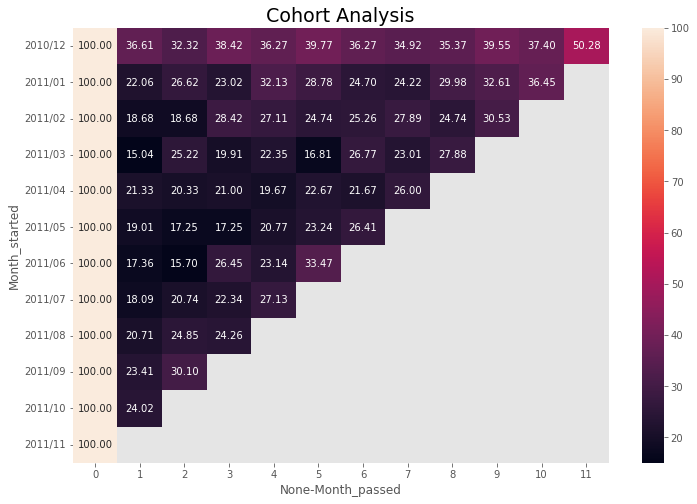

In [58]:
# heatmap 시각화

xticks = np.arange(0, 12)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11']

plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(cohort_customer, annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.2f')
plt.show()

In [47]:
# 2011년 11월에 리텐션이 50%가 넘은 코호트집단 2010년 12월 고객 분석

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [48]:
df_201012 = df[df['InvoiceDate'] < '2011-01-01']
df_201012

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116,United Kingdom,1.25
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116,United Kingdom,9.90


In [60]:
df_201012['CustomerID'].value_counts()

12748    668
17850    297
14911    291
17841    287
14606    228
        ... 
17616      1
13104      1
15070      1
15769      1
15823      1
Name: CustomerID, Length: 885, dtype: int64

In [67]:
df_201012['Country'].value_counts()

United Kingdom     23942
Germany              512
France               434
EIRE                 333
Norway               147
Portugal             116
Belgium               95
Cyprus                83
Spain                 75
Netherlands           72
Japan                 65
Switzerland           49
Italy                 40
Lithuania             35
Australia             32
Iceland               31
Sweden                26
Denmark               20
Channel Islands       17
Finland               17
Poland                 8
Austria                8
Name: Country, dtype: int64

In [76]:
23942/26157

0.9153190350575372

In [77]:
#생각해보니 전체 분석도 안했네? 처음부터 다시~

In [53]:
df_201012['StockCode'].value_counts()

85123A    207
22834     142
22086     141
22423     140
22111     132
         ... 
20892       1
20695       1
71215       1
22145       1
47585A      1
Name: StockCode, Length: 2411, dtype: int64

In [74]:
df_201012['StockCode'].value_counts().head(20)

85123A    207
22834     142
22086     141
22423     140
22111     132
22112     124
22837     109
22961     108
22910     106
22469     106
84029E    105
21479     104
21485     102
22470     101
21034     100
84029G     95
84879      94
22113      93
22867      92
21481      89
Name: StockCode, dtype: int64